# Exploration de trois datasets du NIST

Les trois datasets sont listés [ici](https://www.nist.gov/el/enhancing-maintenance-strategies-manufacturing-operations/data-sets).

# 1. Linear Axis Testbed - Rail Degradation Experiment
[Lien](https://data.nist.gov/od/id/6EF435207EF17114E0532457068155831934)

Ce premier dataset est peu exploitable pour le pronostic.

Il consiste en un rail sur lequel circule un wagon instrumenté. Les auteurs endommagent le rail puis réalisent des mesures via le wagon circulant sur le rail endommagé. Le rail est ré-endommagé et les mesures faites à nouveau, ceci une dizaine de fois.
Ainsi, le modèle de dégradation est statique, la dégradation n'augmentant pas à l'usage. Cela limite donc l'usage dans une perspective similaire au C-MAPSS car il n'y a pas de trajectoire _run-to-failure_. Cela nécessiterait de reprendre les données statiques et de générer des trajectoires dynamiques à partir, demandant beaucoup de boulot, sans compter que les mesures ne sont pas sous forme d'indicateurs (contrairement au C-MAPSS).

# 2. NIST Robot Arm dataset

[Origine des données](https://data.nist.gov/od/id/754A77D9DA1E771AE0532457068179851962)
[Description des données](https://www.nist.gov/el/intelligent-systems-division-73500/degradation-measurement-robot-arm-position-accuracy)

Les données sont importées :

In [4]:
import pandas as pd
import numpy as np

In [5]:
with open("NIST 2 - Robot Arm/ur5testresult_halfspeed_payload1.6lb_1.csv") as f:
    data = f.read().replace("[", "").replace("]", "").replace("(", "").replace(")", "")

with open("NIST 2 - Robot Arm/ur5testresult_halfspeed_payload1.6lb_1_new.csv", "w") as f:
    f.write(data)

with open("NIST 2 - Robot Arm/ur5testresult_halfspeed_payload1.6lb_1_new.csv") as f:
    df_raw = pd.read_csv(f, header=None)

df_raw

0          1          2          3           4           5   \
0     10578.160 -26.880069 -79.911609  57.095392 -157.771764 -105.009613   
1     10578.168 -26.880069 -79.911609  57.095392 -157.771764 -105.009613   
2     10578.176 -26.880069 -79.911609  57.095392 -157.771764 -105.009613   
3     10578.184 -26.880069 -79.911609  57.095392 -157.771764 -105.009613   
4     10578.192 -26.880069 -79.911609  57.095392 -157.771764 -105.009613   
...         ...        ...        ...        ...         ...         ...   
7901  10641.368  -5.921766 -40.113371  44.754526 -182.536450 -110.393252   
7902  10641.376  -5.834062 -40.096781  44.717008 -182.535866 -110.409625   
7903  10641.384  -5.747587 -40.080423  44.680016 -182.535291 -110.425769   
7904  10641.392  -5.662341 -40.064298  44.643550 -182.534724 -110.441683   
7905  10641.400  -5.578325 -40.048405  44.607610 -182.534165 -110.457368   

             6          7          8          9   ...         63        64  \
0    -44.724779 -26.880063 -79.910225  57.096775  ...  11.394501 -1.277984   
1    -44.724779 -26.882795 -79.911591  57.096092  ...  10.391550 -1.062072   
2    -44.724779 -26.880063 -79.912985  57.094726  ...  10.639091 -1.326597   
3    -44.724779 -26.882795 -79.911591  57.094043  ...  11.088970 -1.231685   
4    -44.724779 -26.883505 -79.911591  57.094726  ...  11.425674 -1.315499   
...         ...        ...        ...        ...  ...        ...       ...   
7901 -44.718740  -5.925534 -40.114019  44.748913  ...   5.345777 -2.290782   
7902 -44.718736  -5.839665 -40.096151  44.711866  ...   5.019158 -2.269464   
7903 -44.718732  -5.752375 -40.081043  44.678262  ...   8.597625 -2.343019   
7904 -44.718729  -5.667845 -40.063913  44.639166  ...  10.285732 -2.328303   
7905 -44.718725  -5.583997 -40.046045  44.604906  ...  12.133444 -1.752024   

            65        66         67         68         69         70  \
0     0.481237 -2.904248  24.699991  25.852703  26.359991  28.409979   
1     0.648577 -2.444523  24.699991  25.853434  26.359991  28.409981   
2     0.466600 -2.643244  24.699991  25.853434  26.359991  28.409981   
3     0.486611 -2.738238  24.699991  25.853434  26.359991  28.409981   
4     0.527088 -2.922963  24.699991  25.853434  26.359991  28.409981   
...        ...       ...        ...        ...        ...        ...   
7901 -2.390034  2.867131  24.945414  26.099968  26.499016  28.997280   
7902 -2.288433  2.900331  24.945414  26.099968  26.499016  28.997280   
7903 -2.735710  2.615954  24.945414  26.099968  26.499016  28.997280   
7904 -2.458475  1.598341  24.945414  26.099968  26.499016  28.997280   
7905 -1.879018 -1.544563  24.945414  26.099972  26.499016  28.997280   

             71         72  
0     27.461168  28.659988  
1     27.461168  28.659988  
2     27.461168  28.659988  
3     27.461168  28.659988  
4     27.461168  28.659988  
...         ...        ...  
7901  28.011572  29.298166  
7902  28.011572  29.298166  
7903  28.011572  29.298166  
7904  28.011572  29.298166  
7905  28.011572  29.298166  

[7906 rows x 73 columns]

**Description des données**

La colonne 0 correspond au "Time elapsed since the controller was started"

Les suivantes correspondent aux consignes données au robot et aux mesures correspondantes, mesurées selon 6 dimensions (X, Y, Z, roll, pitch, and yaw) :
- 1:6 - Target joint positions
- 7:12 - Actual joint positions
- 13:18 & 19:24 - Target & Actual velocities
- 25:36 - Currents

Puis enfin, diverses consignes et mesures toujours selon 6 axes:
- 37:42 - Target joint accelerations
- 43:48 - Target joint torques
- 49:54 - Joint control currents
- 55:60 - Actual Cartesian coordinates of the tool: (x,y,z,rx,ry,rz), where rx, ry and rz is a rotation vector representation of the tool orientation
- 61:66 - Generalised forces in the  tool center positions (TCP)
- 67:72 - Temperature of each joint in degrees celsius

Afin d'essayer de se rapporter à des mesures de santé, les erreurs entre consigne (Target) et mesures (Actual) ainsi que les forces au TCP sont extraites ci-dessous. Elles sont tracées ensuite.

In [6]:
df = pd.DataFrame()

df["time"] = df_raw.loc[:, 0] - df_raw.loc[0,0]
df["Position error"] = np.sqrt(((df_raw.loc[:, 1:6].to_numpy() - df_raw.loc[:, 7:12].to_numpy())**2).sum(axis=1))
df["Velocity error"] = np.sqrt(((df_raw.loc[:, 13:18].to_numpy() - df_raw.loc[:, 19:24].to_numpy())**2).sum(axis=1))
df["Currents error"] = np.sqrt(((df_raw.loc[:, 25:30].to_numpy() - df_raw.loc[:, 31:36].to_numpy())**2).sum(axis=1))
df["Forces in TCP"] = np.sqrt(((df_raw.loc[:, 61:66].to_numpy())**2).sum(axis=1))

df.set_index("time", inplace=True)
df

Position error  Velocity error  Currents error  Forces in TCP
time                                                                 
0.000         0.003244        0.000000        0.470503      22.000350
0.008         0.005676        0.000000        0.457740      20.182720
0.016         0.002992        0.000000        0.456797      20.492230
0.024         0.005405        0.000000        0.471323      21.394801
0.032         0.005901        0.000000        0.468772      21.719839
...                ...             ...             ...            ...
63.208        0.009636        0.005600        0.814954      24.242117
63.216        0.008345        0.004789        0.733943      22.221764
63.224        0.007501        0.004482        0.789849      15.956413
63.232        0.008900        0.004841        0.741846      12.598391
63.240        0.008786        0.007997        0.657161      16.237519

[7906 rows x 4 columns]

In [7]:
df.describe()

Position error  Velocity error  Currents error  Forces in TCP
count     7906.000000     7906.000000     7906.000000    7906.000000
mean         0.013549        0.005473        0.666389      20.240352
std          0.007614        0.005062        0.250455      13.889099
min          0.001389        0.000000        0.165061       1.865874
25%          0.007426        0.000728        0.468001      11.955258
50%          0.012034        0.004775        0.591888      17.045586
75%          0.017956        0.008436        0.829893      22.042762
max          0.055096        0.050328        1.546175      88.383795

Text(0.5, 1.0, 'Affichage des erreurs et forces au TCP normalisées')

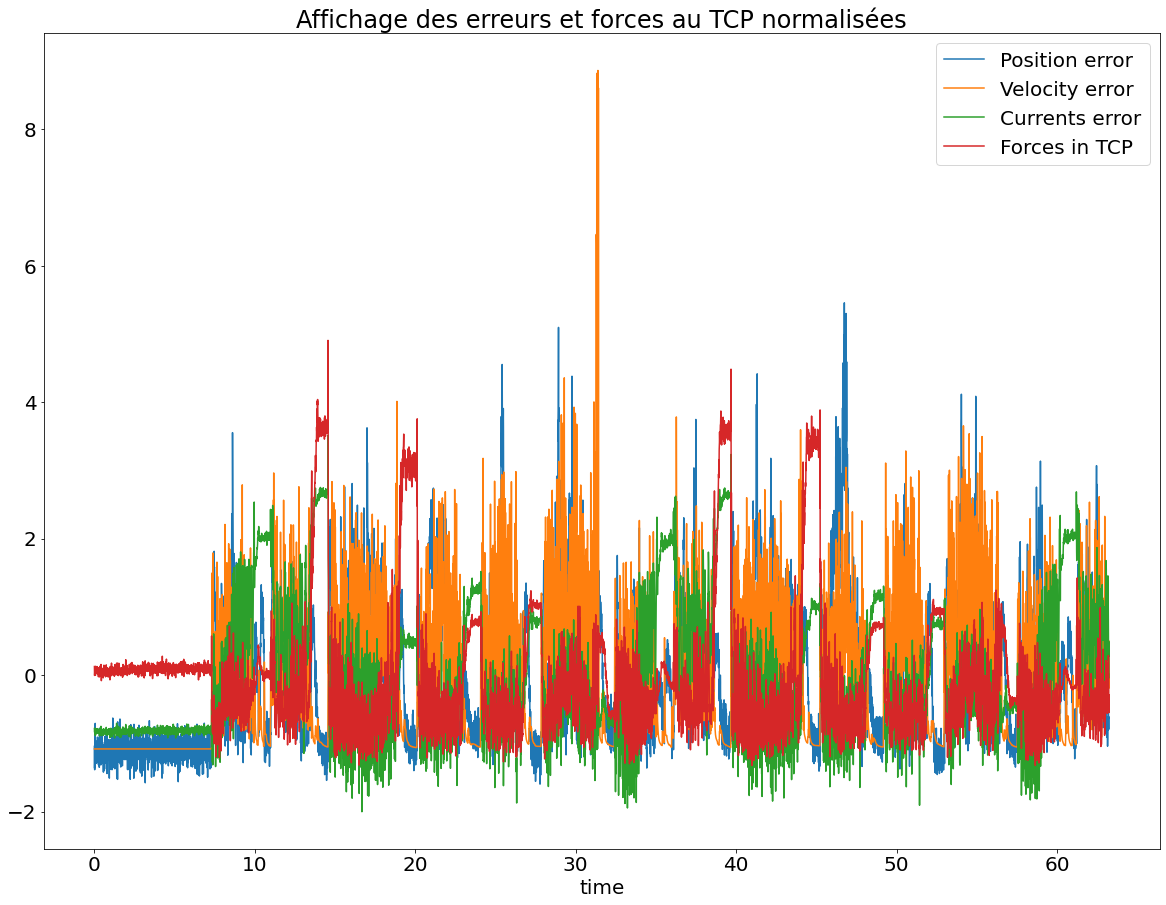

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 20

df_norm = (df - df.mean()) / df.std()
df_norm.plot()

plt.title("Affichage des erreurs et forces au TCP normalisées")

## Premières conclusions

Les données mesurées ne ressemblent pas à celles du C-MAPSS.

Premièrement, elles ne semblent pas être _run-to-failure_. Il n'y a donc pas de variable _RUL_ disponible à estimer.
Deuxièmement, elles présentent des caractéristiques fréquentielles qui nécessiteraient des transformations importantes pour être ramenées dans un format similaire au C-MAPSS.

Néanmoins, les auteurs du dataset proposent dans leur article (Qiao and Weiss 2017) une méthodologie "TCP pose (nda: position and orientation) **health assessment** methodology by using the advanced sensing system (a 7-D measurement system), the designed test method with the robot fixed loop motion, and the advanced error modeling and analysis technique". Il devrait donc être possible de déterminer un niveau de santé à partir de ces mesures, qui pourrait être exploité avec un seuil pour obtenir une 'RUL'. Néanmoins, le problème que les trajectoires ne sont pas run-to-failure est toujours présent.


## References

Qiao, Guixiu, and Brian A. Weiss. 2017. “Accuracy Degradation Analysis for Industrial Robot Systems.” In Volume 3: Manufacturing Equipment and Systems, V003T04A006. Los Angeles, California, USA: American Society of Mechanical Engineers. https://doi.org/10.1115/MSEC2017-2782.

# 3. Process and robot data from a two robot workcell
[Lien](https://data.nist.gov/od/id/mds2-2361)

Ce dataset n'est pas exploitable dans notre cas pour une raison simple et concise: _"There are no known equipment or process degradations in the workcell"_.